In [1]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing important libraries:

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"
!pip install kaleido
import kaleido
import plotly.io as pio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from collections import Counter
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score


In [4]:
import warnings
warnings.filterwarnings('ignore' )
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(15,8)
plt.rcParams['font.size']=18

pd.set_option("display.precision",3)
np.set_printoptions(precision=5, suppress=True)
pd.options.display.float_format = '{:.4f}'.format
pio.renderers.default = "svg"

## Read the data

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/sumeet0701/EV-market-segment-analysis/main/EV%20Data%20set/clean_dataframe.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df['inr(10e3)'] = df['PriceEuro']*0.08320
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,inr(10e3)
0,Tesla,Model 3 Long Range Dual Motor,4.6000,233.0000,450.0000,161.0000,940.0000,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480,4615.9360
1,Volkswagen,ID.3 Pure,10.0000,160.0000,270.0000,167.0000,250.0000,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000,2496.0000
2,Polestar,2,4.7000,210.0000,400.0000,181.0000,620.0000,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440,4695.8080
3,BMW,iX3,6.8000,180.0000,360.0000,206.0000,560.0000,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040,5660.9280
4,Honda,e,9.5000,145.0000,170.0000,168.0000,190.0000,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997,2745.3504


In [6]:
df[(df['Brand'] == 'Tesla ') | (df['Brand'] == 'BMW ')]

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,inr(10e3)
0,Tesla,Model 3 Long Range Dual Motor,4.6000,233.0000,450.0000,161.0000,940.0000,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480,4615.9360
3,BMW,iX3,6.8000,180.0000,360.0000,206.0000,560.0000,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040,5660.9280
8,Tesla,Model 3 Standard Range Plus,5.6000,225.0000,310.0000,153.0000,650.0000,Rear Wheel Drive,Type 2 CCS,Sedan,D,5,46380,3858.8160
13,BMW,i4,4.0000,200.0000,450.0000,178.0000,650.0000,Rear Wheel Drive,Type 2 CCS,Sedan,D,5,65000,5408.0000
21,Tesla,Model Y Long Range Dual Motor,5.1000,217.0000,425.0000,171.0000,930.0000,All Wheel Drive,Type 2 CCS,SUV,D,7,58620,4877.1840
24,Tesla,Model 3 Long Range Performance,3.4000,261.0000,435.0000,167.0000,910.0000,All Wheel Drive,Type 2 CCS,Sedan,D,5,61480,5115.1360
28,BMW,i3 120 Ah,7.3000,150.0000,235.0000,161.0000,270.0000,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,38017,3163.0144
33,Tesla,Cybertruck Tri Motor,3.0000,210.0000,750.0000,267.0000,710.0000,All Wheel Drive,Type 2 CCS,Pickup,N,6,75000,6240.0000
40,Tesla,Model S Long Range,3.8000,250.0000,515.0000,184.0000,560.0000,All Wheel Drive,Type 2,Liftback,F,5,79990,6655.1680
51,Tesla,Roadster,2.1000,410.0000,970.0000,206.0000,920.0000,All Wheel Drive,Type 2 CCS,Cabrio,S,4,215000,17888.0000


## Information of the type of data in seach column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brand       98 non-null     object 
 1   Model       98 non-null     object 
 2   Accel       98 non-null     float64
 3   TopSpeed    98 non-null     float64
 4   Range       98 non-null     float64
 5   Efficiency  98 non-null     float64
 6   FastCharge  98 non-null     float64
 7   PowerTrain  98 non-null     object 
 8   PlugType    98 non-null     object 
 9   BodyStyle   98 non-null     object 
 10  Segment     98 non-null     object 
 11  Seats       98 non-null     int64  
 12  PriceEuro   98 non-null     int64  
 13  inr(10e3)   98 non-null     float64
dtypes: float64(6), int64(2), object(6)
memory usage: 10.8+ KB


## Finding out the number of null values

In [8]:
df.isnull().sum()

Brand         0
Model         0
Accel         0
TopSpeed      0
Range         0
Efficiency    0
FastCharge    0
PowerTrain    0
PlugType      0
BodyStyle     0
Segment       0
Seats         0
PriceEuro     0
inr(10e3)     0
dtype: int64

## Descriptive Statistics of the dataset

In [9]:
df.describe()

,Accel,TopSpeed,Range,Efficiency,FastCharge,Seats,PriceEuro,inr(10e3)
count,98.0000,98.0000,98.0000,98.0000,98.0000,98.0000,98.0000,98.0000
mean,7.0469,181.6531,350.1531,189.8673,456.7347,4.9592,57324.6837,4769.4137
std,2.4839,43.2485,118.2180,30.0558,201.2629,0.6874,34288.2464,2852.7821
min,2.1000,123.0000,170.0000,104.0000,170.0000,4.0000,20129.0000,1674.7328
25%,5.1000,150.0000,258.7500,168.0000,275.0000,5.0000,35000.0000,2912.0000
50%,7.3000,167.0000,350.0000,181.0000,440.0000,5.0000,45000.0000,3744.0000
75%,8.9500,200.0000,407.5000,206.0000,560.0000,5.0000,65465.0000,5446.6880
max,14.0000,410.0000,970.0000,273.0000,940.0000,7.0000,215000.0000,17888.0000


In [10]:
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(include=['int','float']).columns

In [11]:
len(num_col)

8

# Data Visualization:
Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable. We can also plot a single graph for multiple samples which helps in more efficient data visualization.

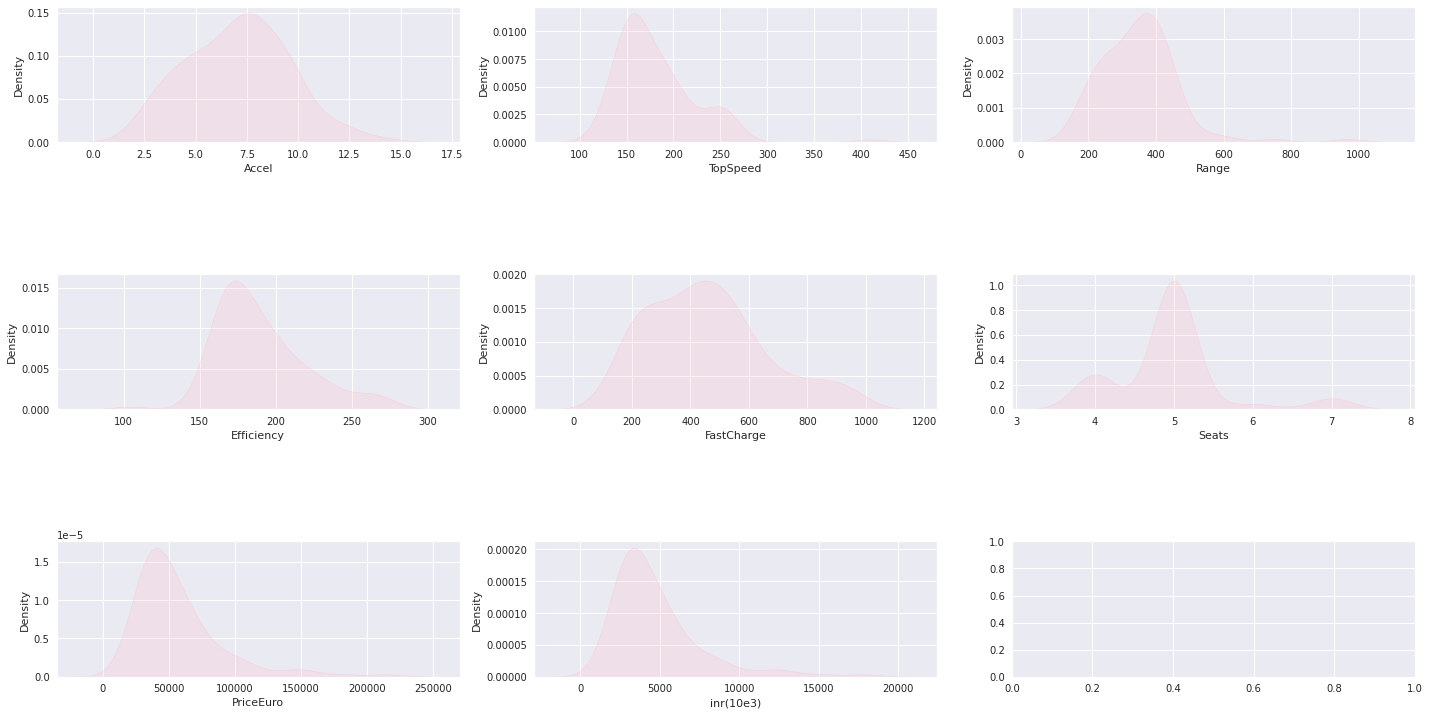

In [12]:

fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in num_col:
        sns.kdeplot(x=col, data=df, ax=ax[index],color ='pink',shade =True)
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

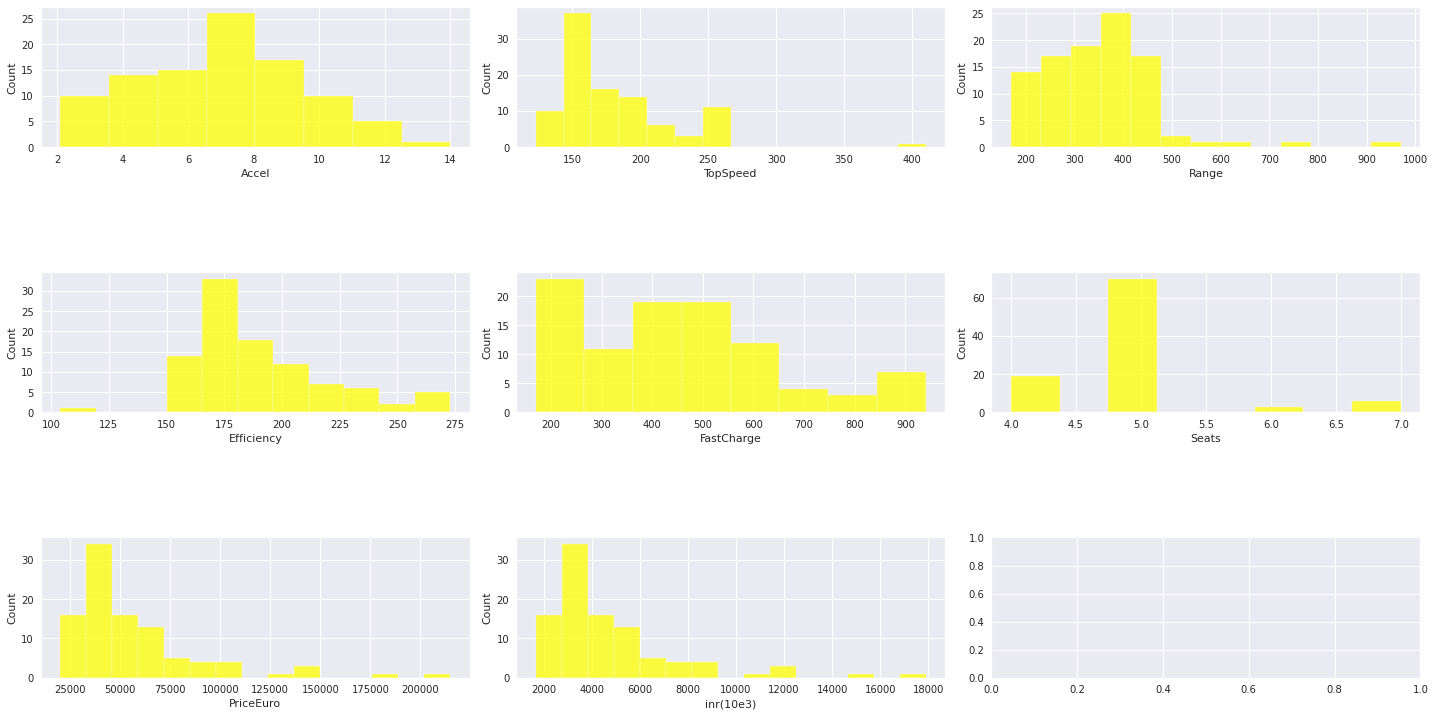

In [13]:

fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in num_col:
        sns.histplot(x=col,data = df, ax=ax[index],color ='yellow')
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

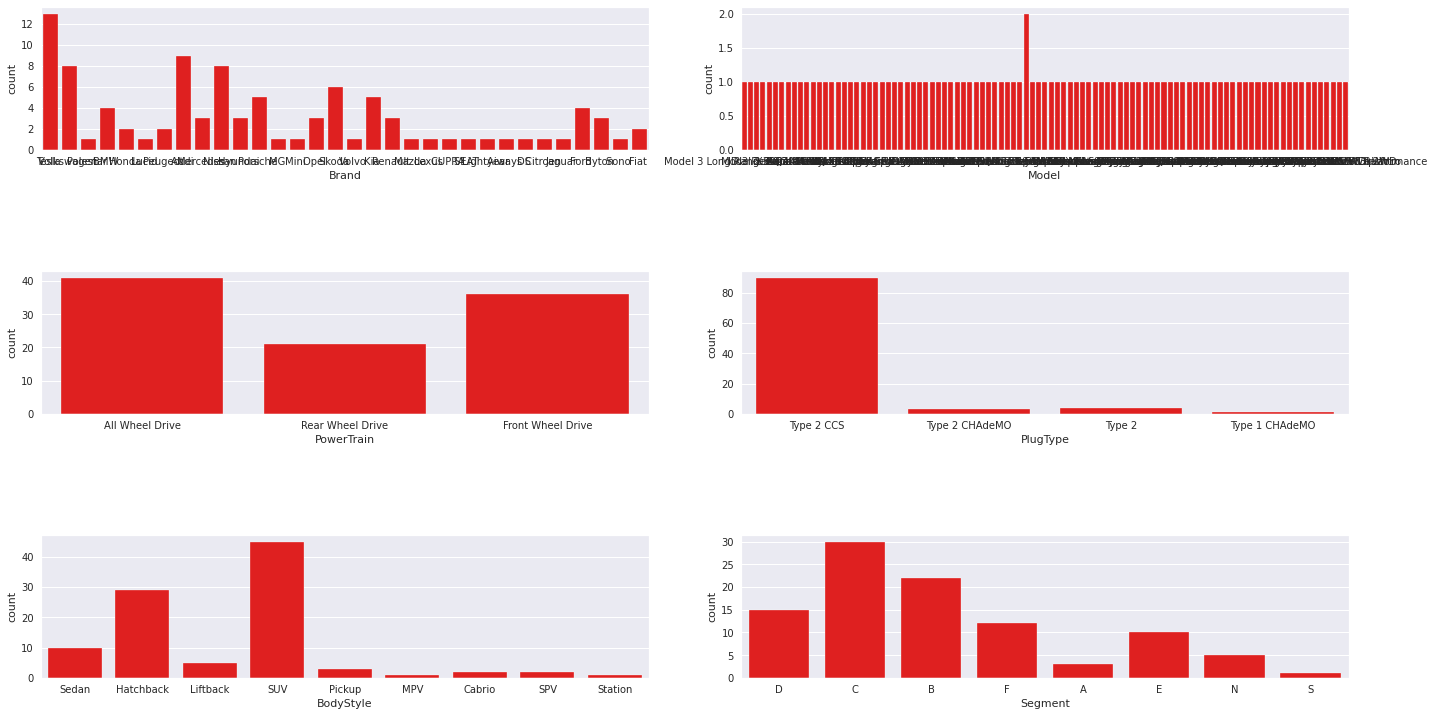

In [14]:
# countplot
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in cat_col:
        sns.countplot(x=col, data=df, ax=ax[index],color ='red',)
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

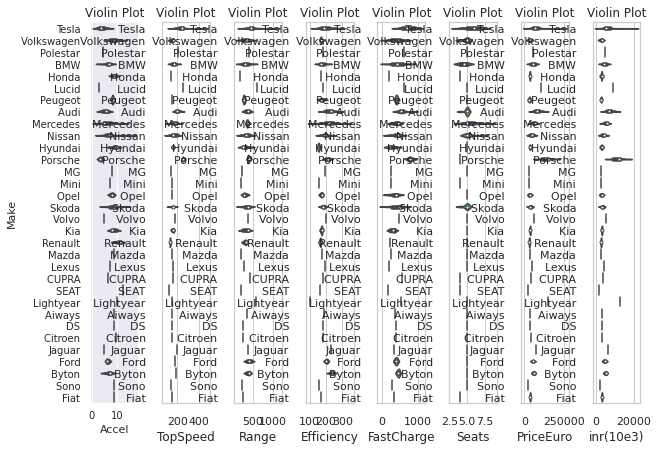

In [15]:
plt.figure(1,figsize=(15,7))
n = 0
for cols in num_col:
  n += 1
  plt.subplot(1,12,n)
  sns.set(style = 'whitegrid')
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.violinplot(x= cols, y = 'Brand', data=df)
  plt.ylabel("Make" if n==1 else '')
  plt.title('Violin Plot')

In [16]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


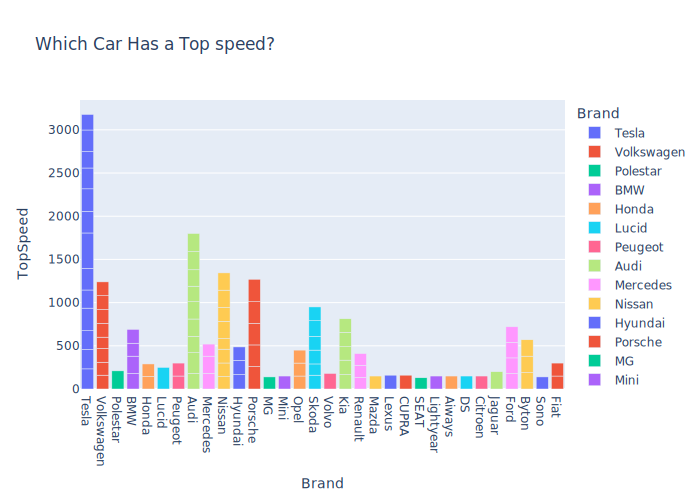

In [17]:
fig = px.bar(df,x='Brand',
             y = 'TopSpeed',
             color = 'Brand',
             title = 'Which Car Has a Top speed?',labels = {'x':'Car Brands','y':'Top Speed Km/H'})
#pio.show(fig)
fig.show()

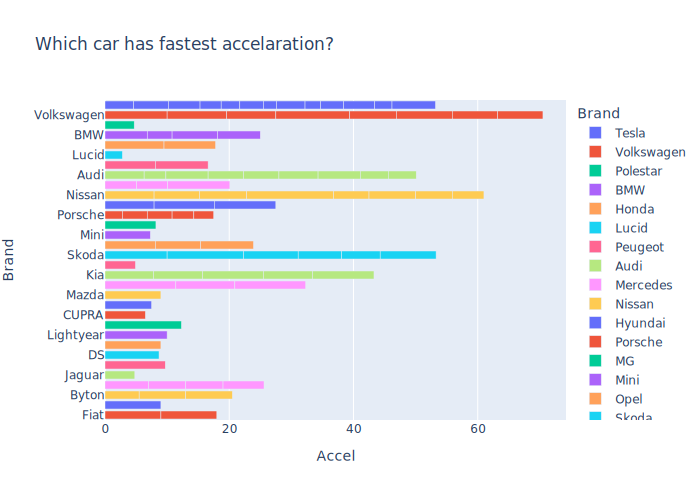

In [18]:
fig = px.bar(df,x='Accel',
             y = 'Brand',
             color = 'Brand',
             title = 'Which car has fastest accelaration?',
             labels = {'x':'Accelaration','y':'Car Brands'})
pio.show(fig)

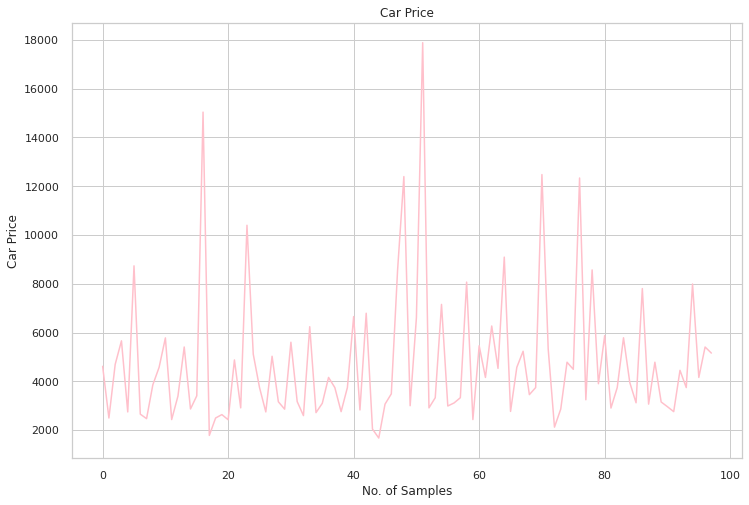

In [19]:
df['inr(10e3)'].plot(figsize = (12,8),
                     title='Car Price',
                     xlabel = 'No. of Samples',
                     ylabel = 'Car Price',color = 'pink')

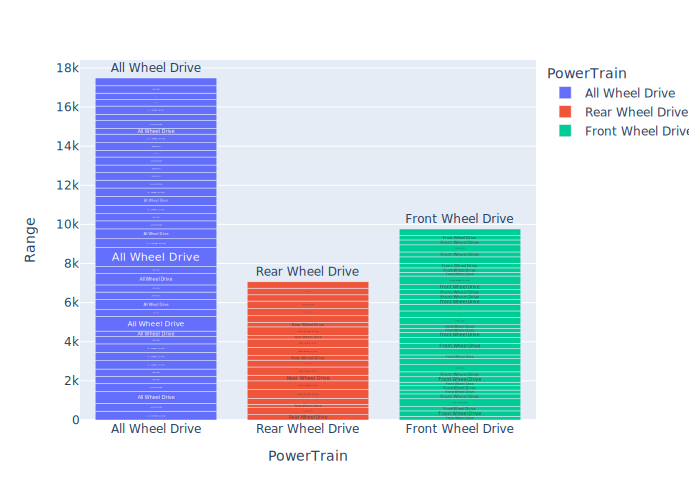

In [20]:
fig = px.bar(df,y = 'Range',
             x = 'PowerTrain',
             color = 'PowerTrain',text='PowerTrain')
pio.show(fig)

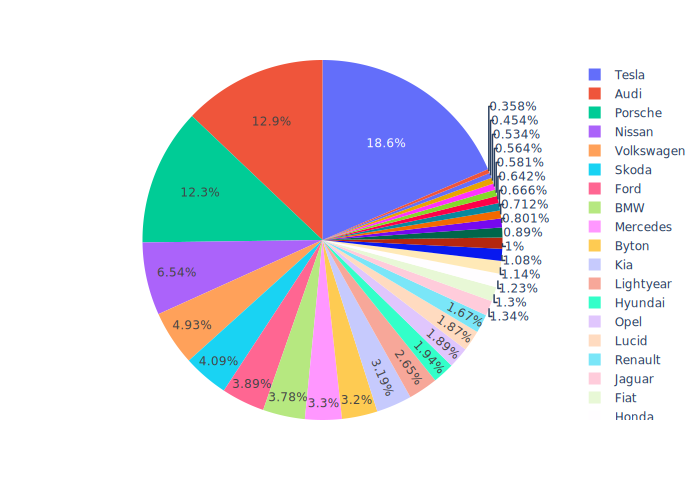

In [21]:
fig = px.pie(df,names = 'Brand',values = 'inr(10e3)')
pio.show(fig)

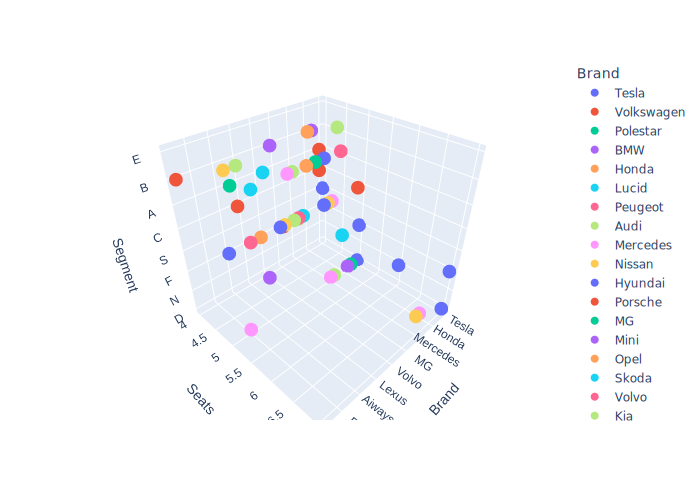

In [22]:
fig = px.scatter_3d(df,x = 'Brand',y = 'Seats',z = 'Segment',color='Brand')
pio.show(fig)

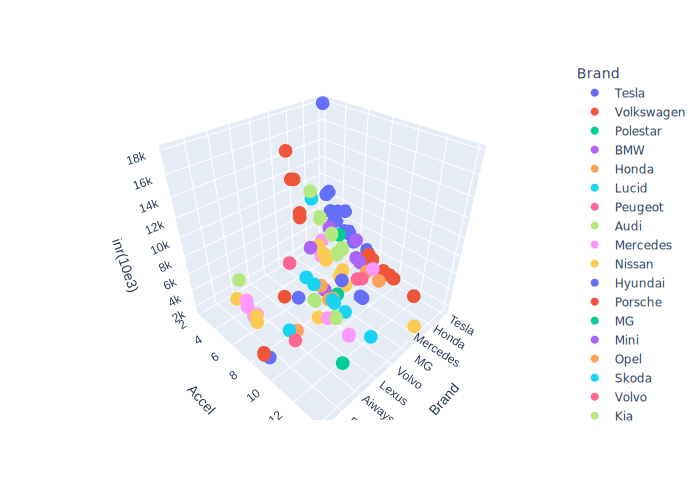

In [23]:
fig = px.scatter_3d(df,x = 'Brand',y = 'Accel',z = 'inr(10e3)',color = 'Brand')
pio.show(fig)

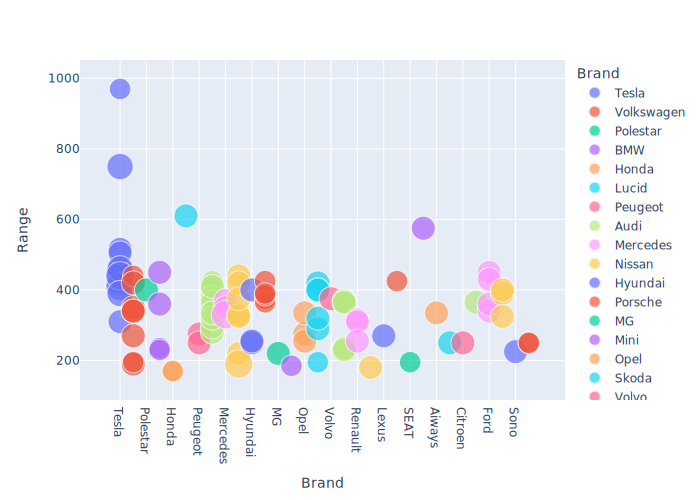

In [26]:
fig = px.scatter(df,x = 'Brand',
                 y = 'Range',
                 size='Seats',
                 color = 'Brand',
                 hover_data=['inr(10e3)'])
pio.show(fig)

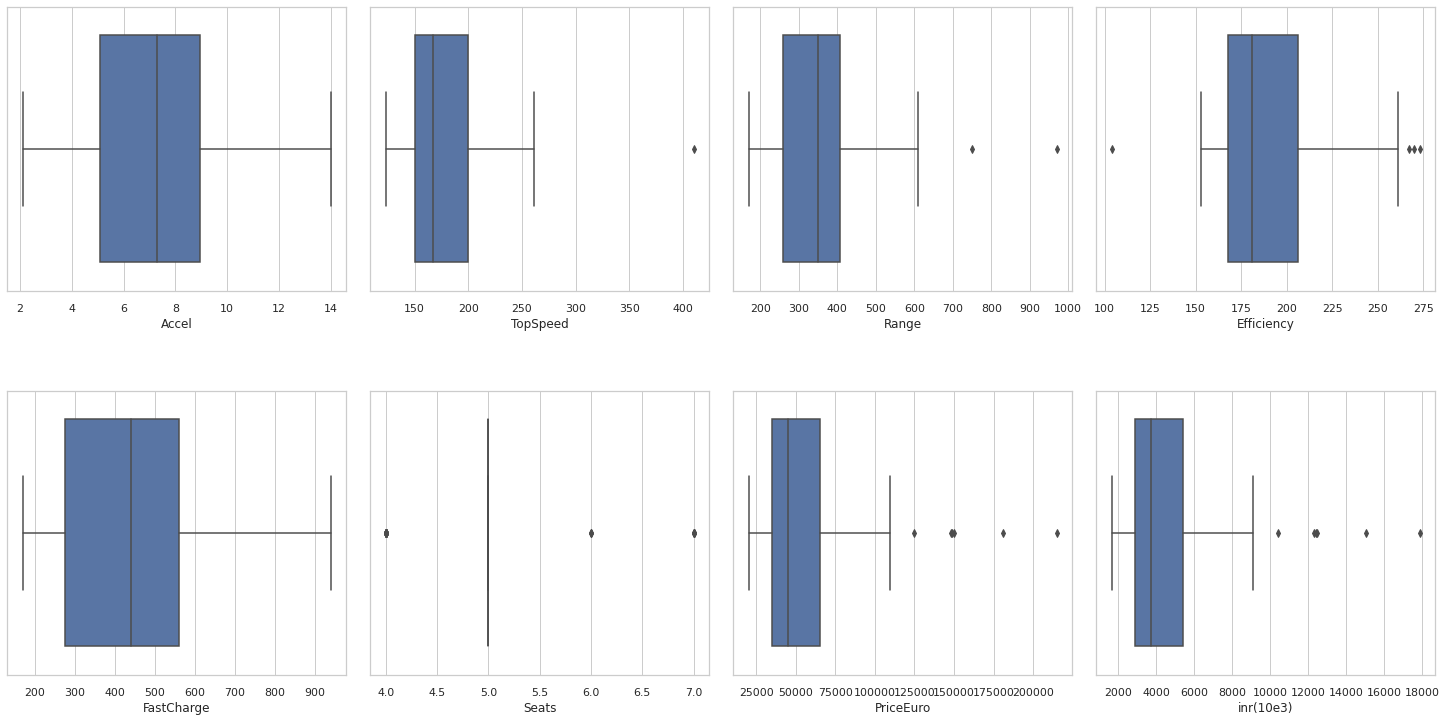

In [28]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in num_col:
        sns.boxplot(x=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## Pairplot of all the columns based on Rapid Charger presence

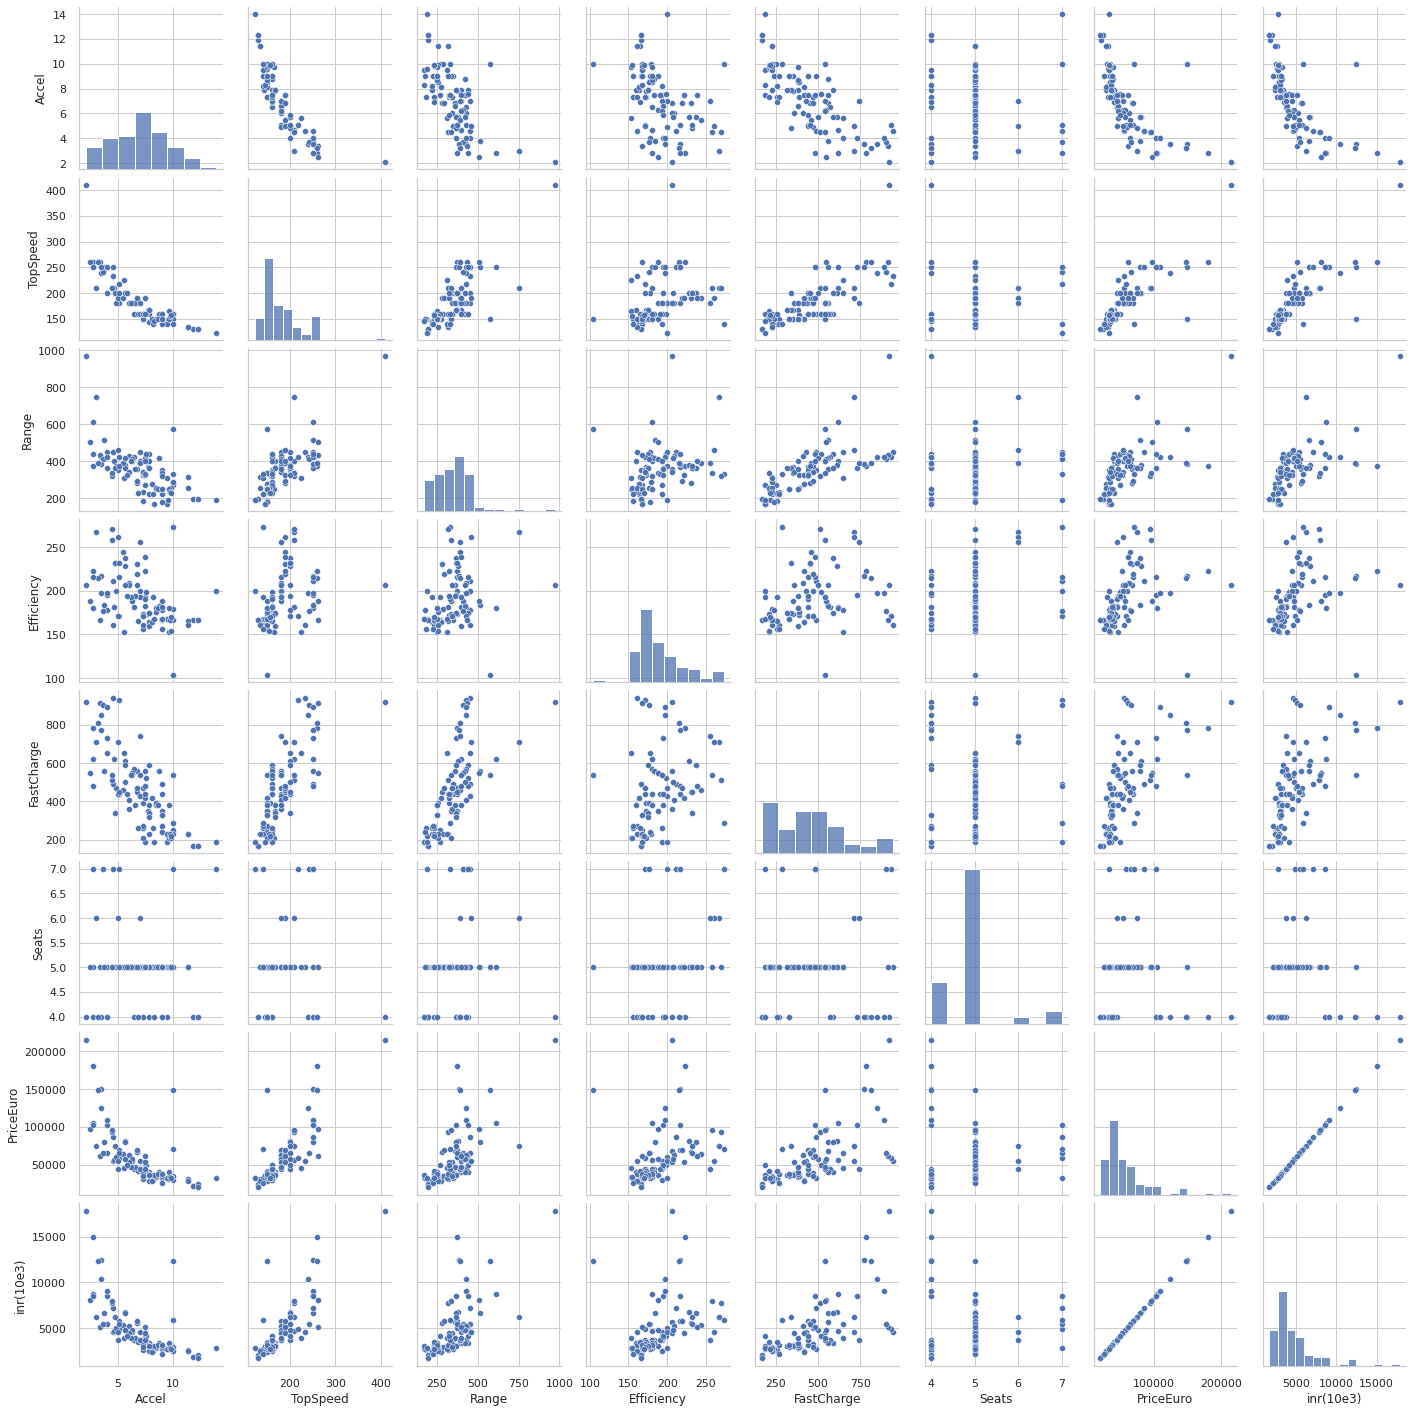

In [30]:
sns.pairplot(df)

# Correlation

In [31]:
df.corr()

,Accel,TopSpeed,Range,Efficiency,FastCharge,Seats,PriceEuro,inr(10e3)
Accel,1.0000,-0.8447,-0.6568,-0.4391,-0.7684,-0.0466,-0.6832,-0.6832
TopSpeed,-0.8447,1.0000,0.7293,0.3435,0.7697,0.0238,0.8222,0.8222
Range,-0.6568,0.7293,1.0000,0.2962,0.6981,0.1542,0.6630,0.6630
Efficiency,-0.4391,0.3435,0.2962,1.0000,0.3073,0.2901,0.3843,0.3843
FastCharge,-0.7684,0.7697,0.6981,0.3073,1.0000,0.0966,0.6516,0.6516
Seats,-0.0466,0.0238,0.1542,0.2901,0.0966,1.0000,-0.0865,-0.0865
PriceEuro,-0.6832,0.8222,0.6630,0.3843,0.6516,-0.0865,1.0000,1.0000
inr(10e3),-0.6832,0.8222,0.6630,0.3843,0.6516,-0.0865,1.0000,1.0000


## Heatmap to show the correlation of the data

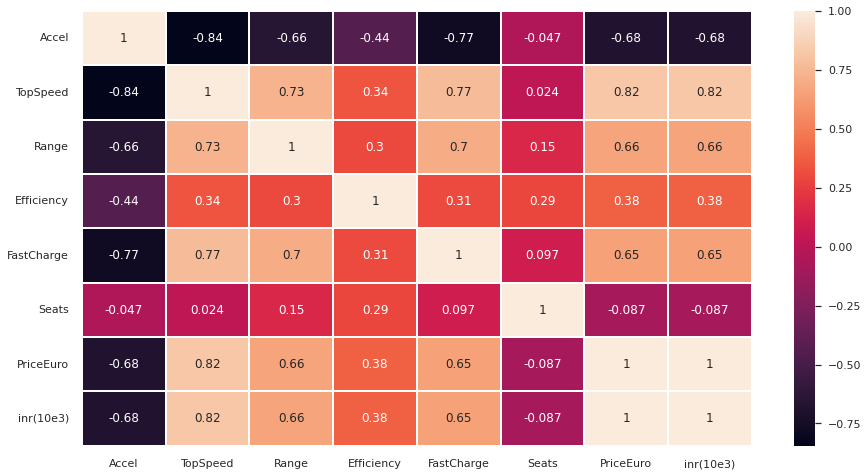

In [32]:
ax= plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)

In [33]:
a=np.arange(1,99)

# Making Some Comparisions for our dataset


## Frequency of the Brands in the dataset

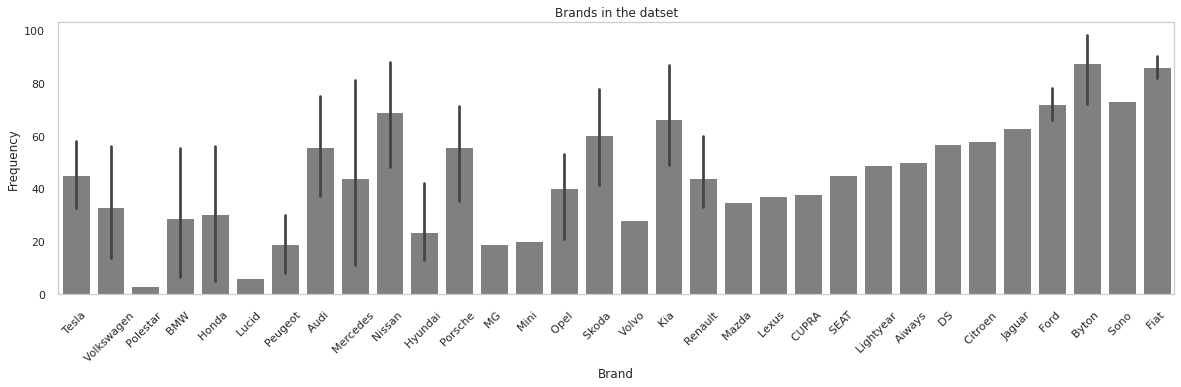

In [34]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y=a,data=df,color ='grey')
plt.grid(axis='y')
plt.title('Brands in the datset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Byton , Fiat and smart are the prominent brands and Polestar being the least


## Top speeds achieved by the cars of a brand

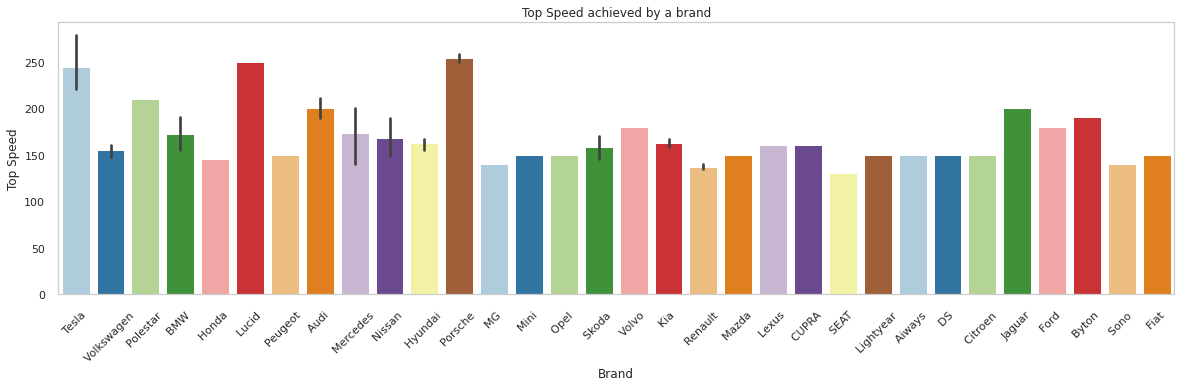

In [36]:
from pyparsing.helpers import string_start
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='TopSpeed',data=df,palette='Paired', color ='purple')
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)
plt.show()

Porsche, Lucid and Tesla produce the fastest cars and Smart the lowest


## Range a car can achieve

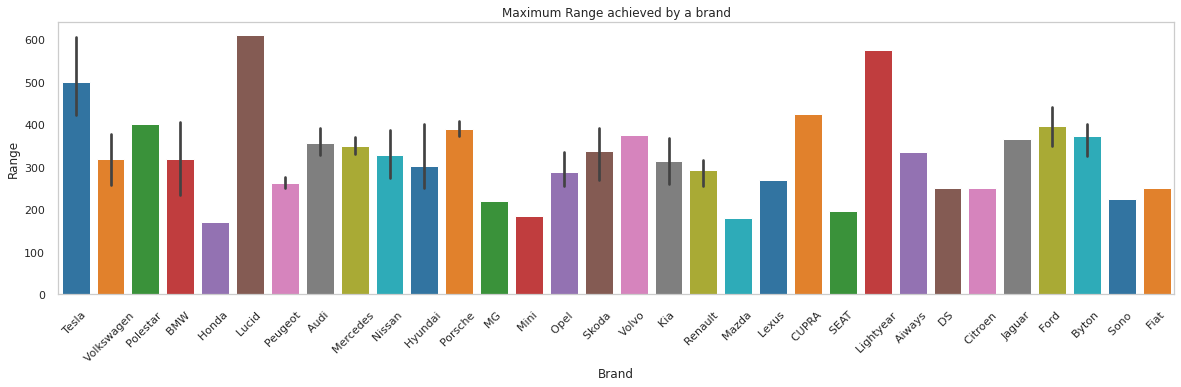

In [37]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Range',data=df,palette='tab10',color ='pink')
plt.grid(axis='y')
plt.title('Maximum Range achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Range')
plt.xticks(rotation=45)
plt.show()

Lucid, Lightyear and Tesla have the highest range and Smart the lowest

## Car efficiency

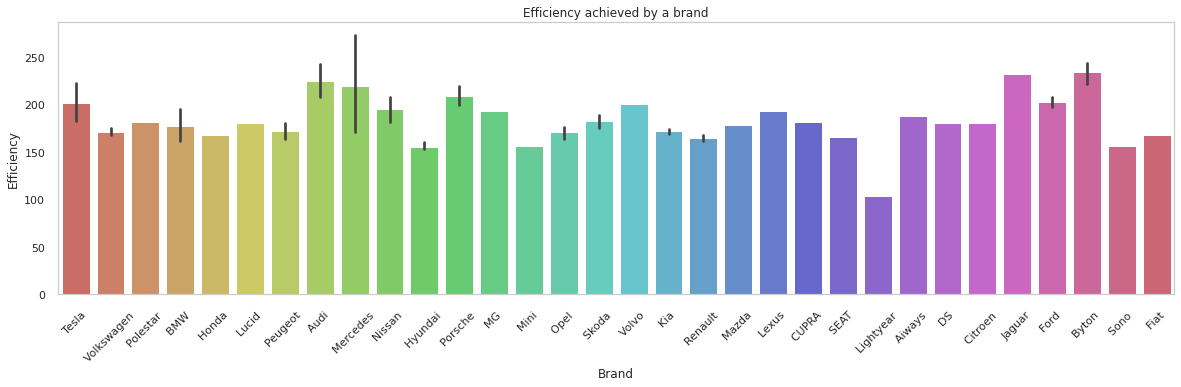

In [38]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Efficiency',data=df,palette='hls')
plt.grid(axis='y')
plt.title('Efficiency achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)
plt.show()

Byton , Jaguar and Audi are the most efficient and Lightyear the least

## Number of seats in each car

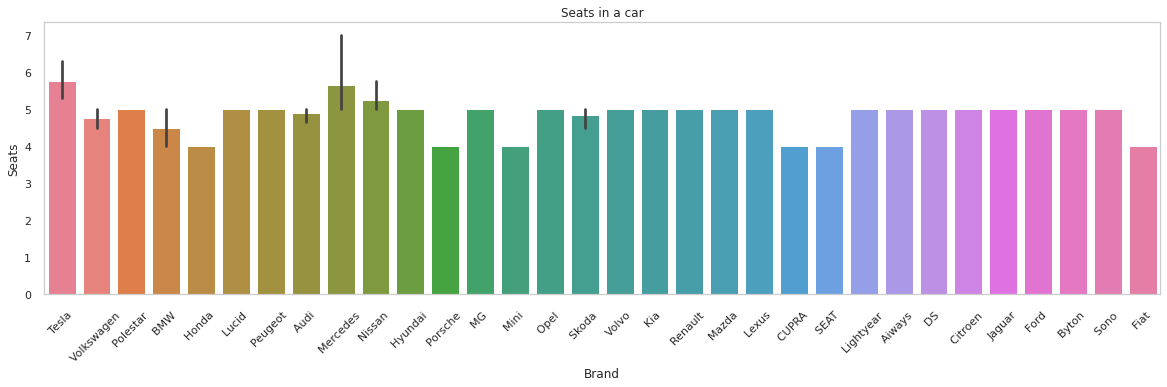

In [39]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Seats',data=df,palette='husl')
plt.grid(axis='y')
plt.title('Seats in a car')
plt.xlabel('Brand')
plt.ylabel('Seats')
plt.xticks(rotation=45)
plt.show()

Mercedes, Tesla and Nissan have the highest number of seats and Smart the lowest

## Price of cars (in INR)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

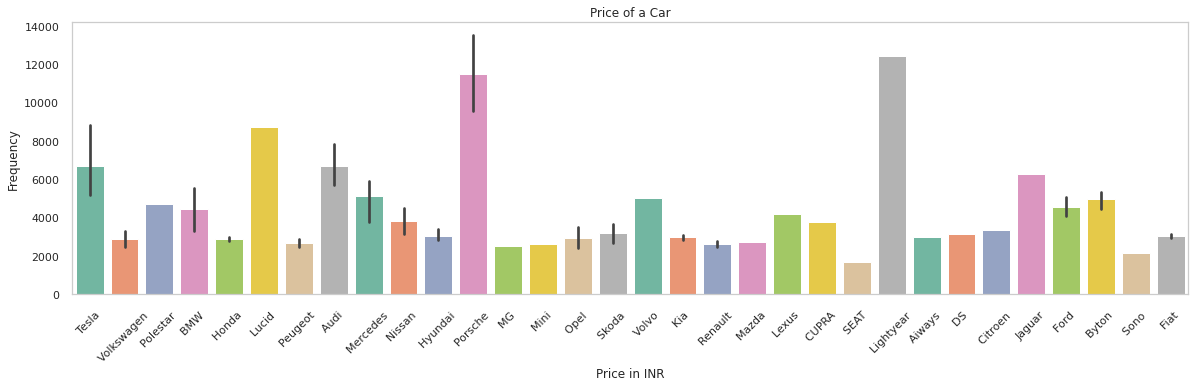

In [40]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='inr(10e3)',data=df,palette='Set2')
plt.title('Price of a Car')
plt.xlabel('Price in INR')
plt.grid(axis='y')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

Lightyear, Porsche and Lucid are the most expensive and SEAT and Smart the least

## Type of Plug used for charging

Text(0.5, 1.0, 'Plug Type')

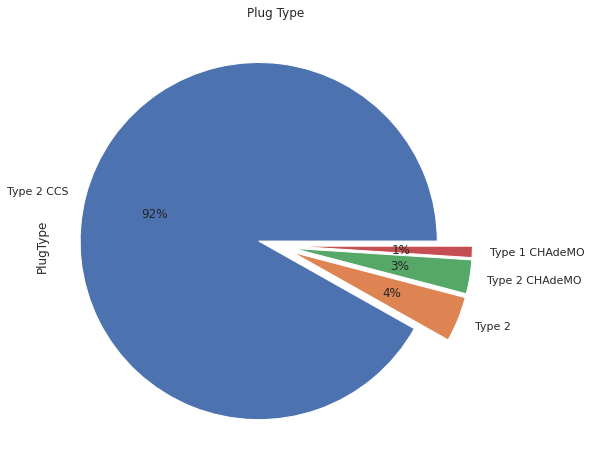

In [41]:
df['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')

Most companies use Type 2 CCS and Type 1 CHAdeMo the least

## Cars and their body style

Text(0.5, 1.0, 'Body Style')

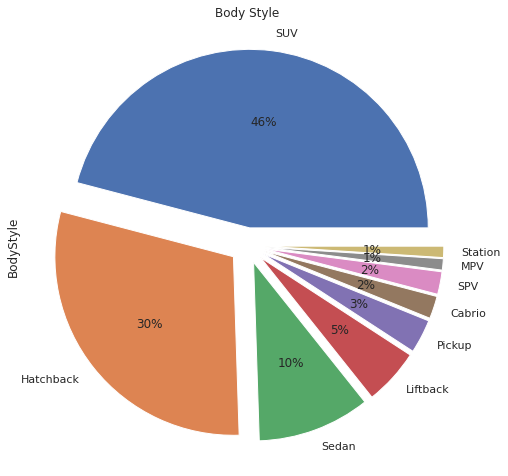

In [42]:
df['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')

Most cars are eiher SUV or Hatchback

## Segment in which the cars fall under

Text(0.5, 1.0, 'Segment')

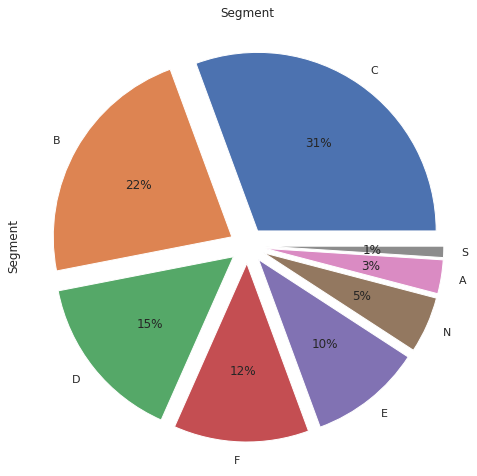

In [43]:
df['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')

Most cars are either C or B type

## Number of Seats

Text(0.5, 1.0, 'Seats')

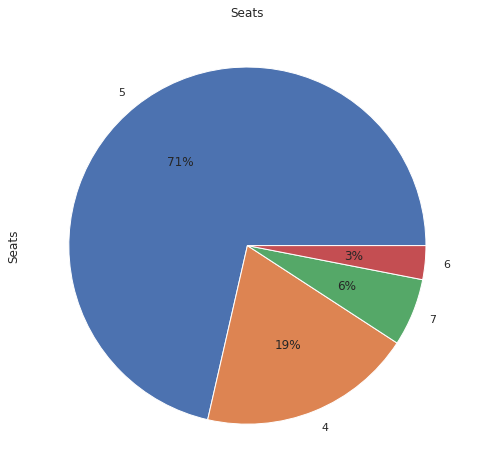

In [45]:
df['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%')
plt.title('Seats')

Majority of cars have 5 seats

In [46]:
df3= df[["TopSpeed", "inr(10e3)"]].groupby("TopSpeed").count()
df4= df[["Range", "inr(10e3)"]].groupby("Range").count()
df5= df[["Range", "TopSpeed"]].groupby("Range").count()
df5.head()

,TopSpeed
Range,
170.0000,2
180.0000,1
185.0000,1
190.0000,2
195.0000,3


In [47]:
df3=df3.sort_values("TopSpeed",ascending = False).head(10)
df4=df4.sort_values("Range",ascending = False).head(10)
df5=df5.sort_values("Range",ascending = False).head(10)

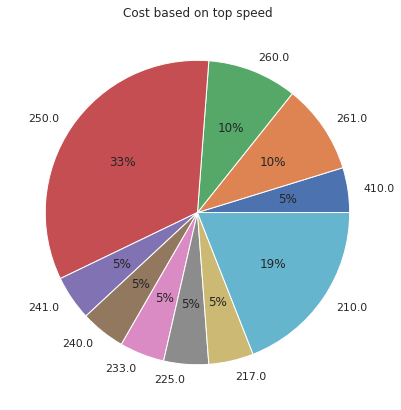

In [48]:
plt.figure(figsize=(10,7))
plt.title('Cost based on top speed')
plt.pie(x=df3["inr(10e3)"],labels=df3.index,autopct='%1.0f%%')
plt.show()

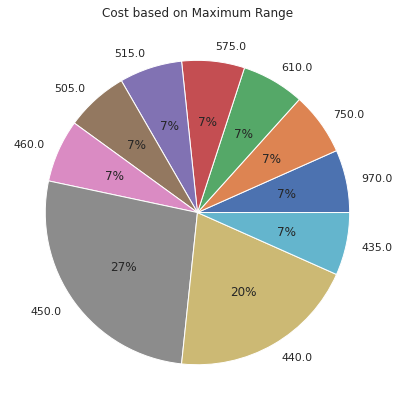

In [49]:
plt.figure(figsize=(10,7))
plt.title('Cost based on Maximum Range')
plt.pie(x=df4["inr(10e3)"],labels=df4.index,autopct='%1.0f%%')
plt.show()

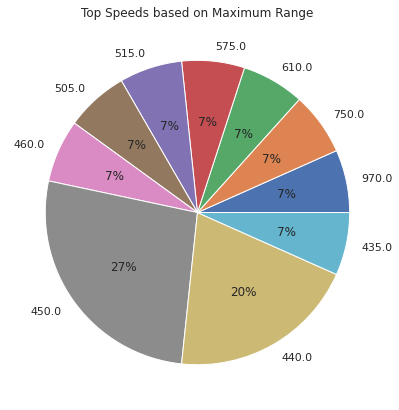

In [51]:
plt.figure(figsize=(10,7))
plt.title('Top Speeds based on Maximum Range')
plt.pie(x=df5["TopSpeed"],labels=df5.index,autopct='%1.0f%%')
plt.show()

# Regression

## Putting independent variables as x and dependent variable as y

In [53]:
df['PowerTrain'].replace(to_replace=['All Wheel Drive','Rear Wheel Drive','Front Wheel Drive'],value=[0, 2,1],inplace=True)
x=df[['Accel','Range','TopSpeed','Efficiency','PowerTrain']]
y=df['PriceEuro']

## Finding out the linear regression using OLS method

In [54]:
x= sm.add_constant(x)
results = sm.OLS(y,x)

## Fitting the model and summarizing

In [55]:
model=results.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     45.16
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           2.54e-23
Time:                        07:08:06   Log-Likelihood:                -1101.2
No. Observations:                  98   AIC:                             2214.
Df Residuals:                      92   BIC:                             2230.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.757e+04   3.08e+04     -3.167      0.002   -1.59e+05   -3.64e+04
Accel       2142.8352   1536.122      1.395      0.166    -908.035    5193.705
Range         40.3503     23.962      1.684      0.096      -7.240      87.941
TopSpeed     591.3890     93.934      6.296      0.000     404.828     777.950
Efficiency   120.4123     72.889      1.652      0.102     -24.351     265.176
PowerTrain -5812.8698   3062.486     -1.898      0.061   -1.19e+04     269.492
==============================================================================
Omnibus:                       78.271   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              594.320
Skew:                           2.544   Prob(JB):                    8.81e-130
Kurtosis:                      13.939   Cond. No.                     7.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Notes:

1. Standard Errors assume that the covariance matrix of the errors is correctly specified.
2. The condition number is large, 5.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.

Only Top Speed and Efficieny are the two variables related to price

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

In [57]:
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

## Finding out the R-squared value

In [58]:
r2=(r2_score(y_test,pred))
print(r2*100)

71.96658310665906


Around 78% of the dependant variable has been explained by the independant variables

## Clustering

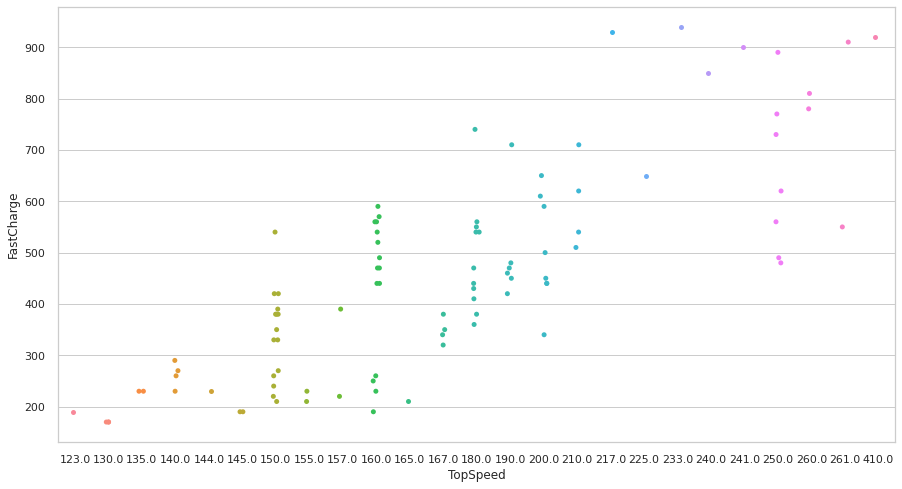

In [61]:
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed', y='FastCharge', data=df, jitter=True)

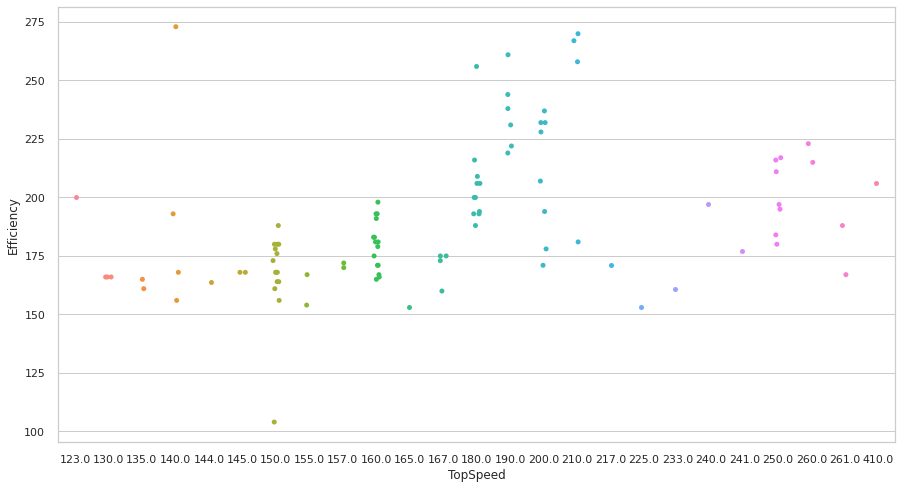

In [62]:
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed', y='Efficiency', data=df, jitter=True)

In [65]:
features = ['Accel','TopSpeed','Efficiency','FastCharge','Range', 'Seats', 'inr(10e3)','PowerTrain']
# Separating out the features
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [69]:
pca = PCA(n_components=8)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8'])
data2

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8
0,2.2962,-0.7388,1.2263,1.0796,-1.2576,0.5097,0.6685,-0.4295
1,-2.3951,-0.1877,0.6607,-0.4496,0.3314,-0.4780,-0.2003,-0.3254
2,1.4201,-0.1548,0.1658,0.8124,-0.6818,0.3500,-0.1554,-0.0693
3,0.0379,-0.1056,0.6317,-1.5528,-0.0483,-0.4208,0.2903,0.2106
4,-2.9541,-1.2492,-0.5197,-0.6743,-0.0833,-0.4782,-0.2088,-0.0666
...,...,...,...,...,...,...,...,...
93,-0.6116,0.1927,0.0615,-0.1825,-0.1171,0.1835,0.1093,0.1469
94,2.1852,0.9438,-1.6979,-0.7453,-0.1773,-0.2900,0.0873,0.1203
95,0.5406,0.2803,-0.5821,0.6969,-0.4354,0.1100,-0.3643,-0.2468
96,1.3504,0.7742,-1.1160,-0.1676,-0.1364,0.3160,-0.3745,-0.0671


In [70]:
df_9=data2.iloc[:,:9]
df_9.head(3)

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8
0,2.2962,-0.7388,1.2263,1.0796,-1.2576,0.5097,0.6685,-0.4295
1,-2.3951,-0.1877,0.6607,-0.4496,0.3314,-0.4780,-0.2003,-0.3254
2,1.4201,-0.1548,0.1658,0.8124,-0.6818,0.3500,-0.1554,-0.0693


In [71]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_9.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
variable,,,,,,,,
PC1,-0.4223,0.0639,0.0075,0.0753,0.5101,-0.0092,0.5524,-0.4964
PC2,0.4355,-0.1563,0.0749,0.0229,-0.0277,-0.3759,-0.2991,-0.7404
PC3,0.2459,0.4925,-0.5103,-0.6262,0.0343,0.1415,0.0741,-0.1333
PC4,0.3999,-0.0964,0.3123,-0.0792,-0.4574,0.1156,0.7089,-0.0432
Pc5,0.3832,-0.0467,0.4131,-0.0811,0.5350,0.5999,-0.1652,0.0167
PC6,0.0620,0.8007,0.4624,0.1861,0.0326,-0.3108,-0.0319,0.0894
PC7,0.4042,-0.1971,-0.1688,-0.0134,0.4912,-0.5403,0.2485,0.4174
PC8,-0.3123,-0.1936,0.4727,-0.7444,0.0115,-0.2771,-0.0855,0.0568


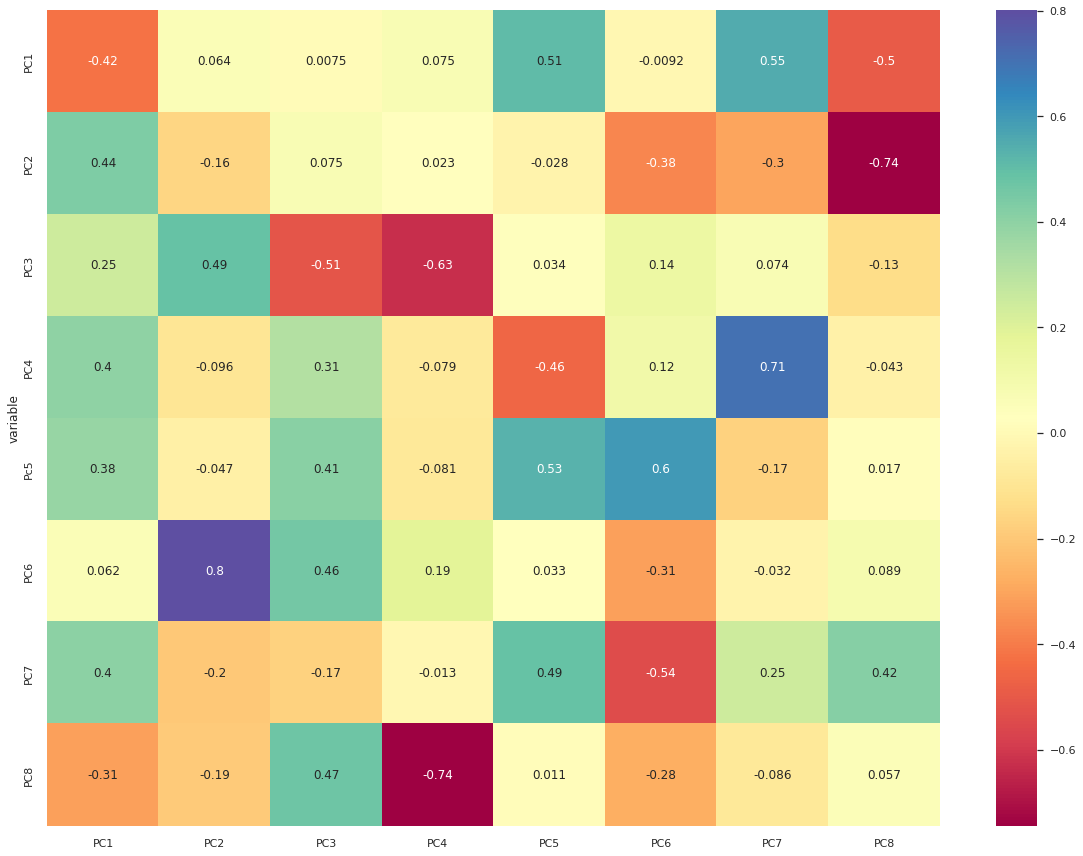

In [72]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

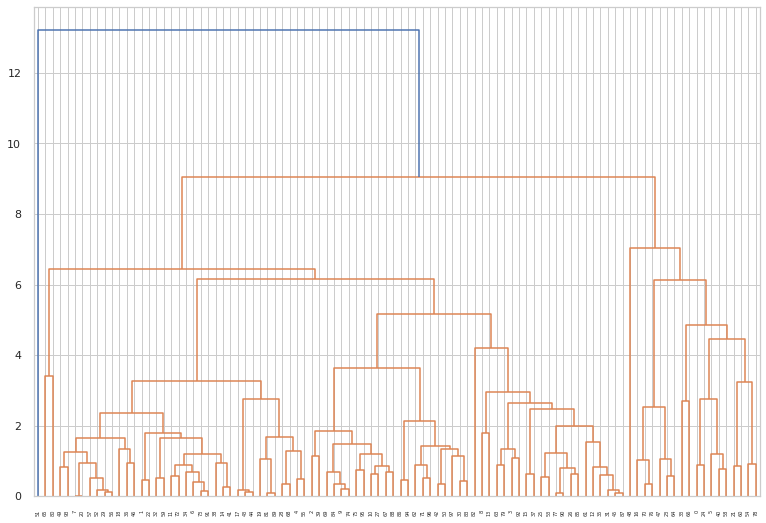

In [73]:
linked = linkage(data2, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()

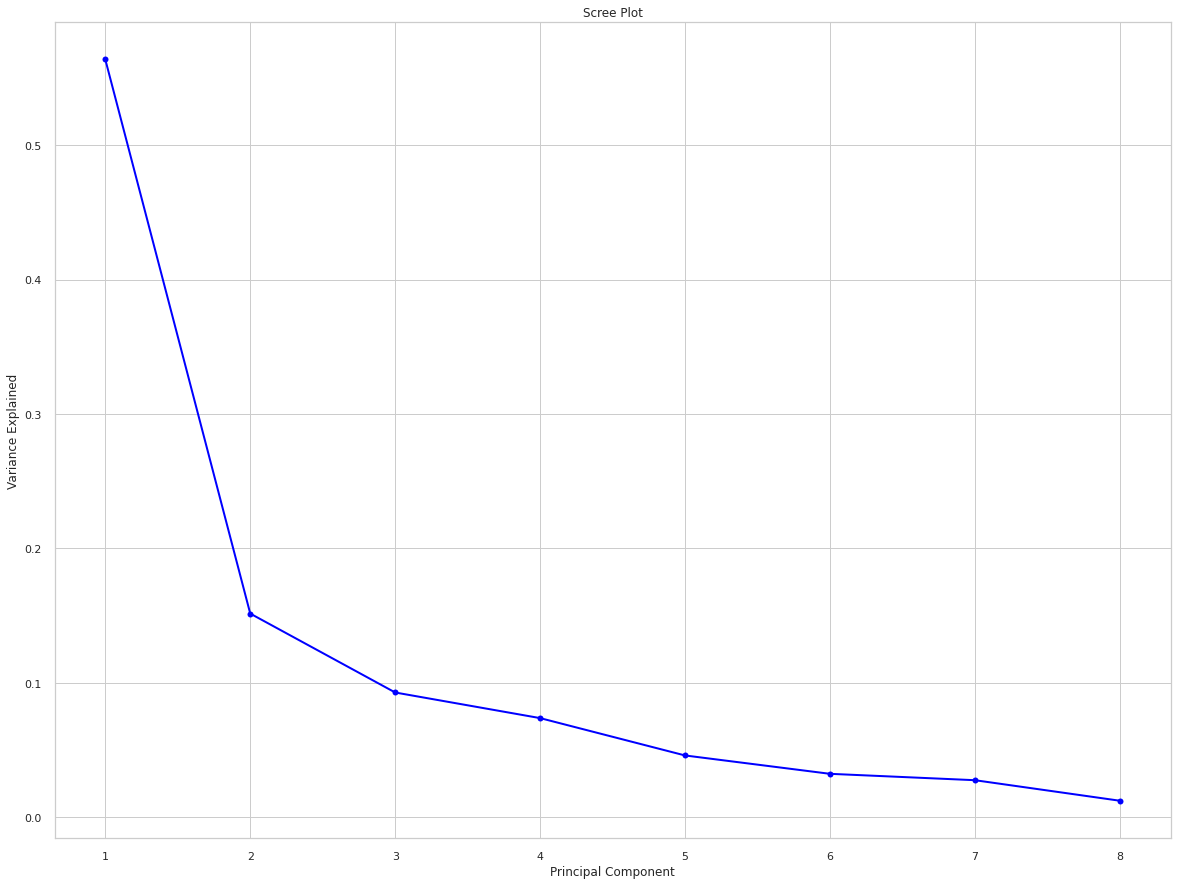

In [74]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

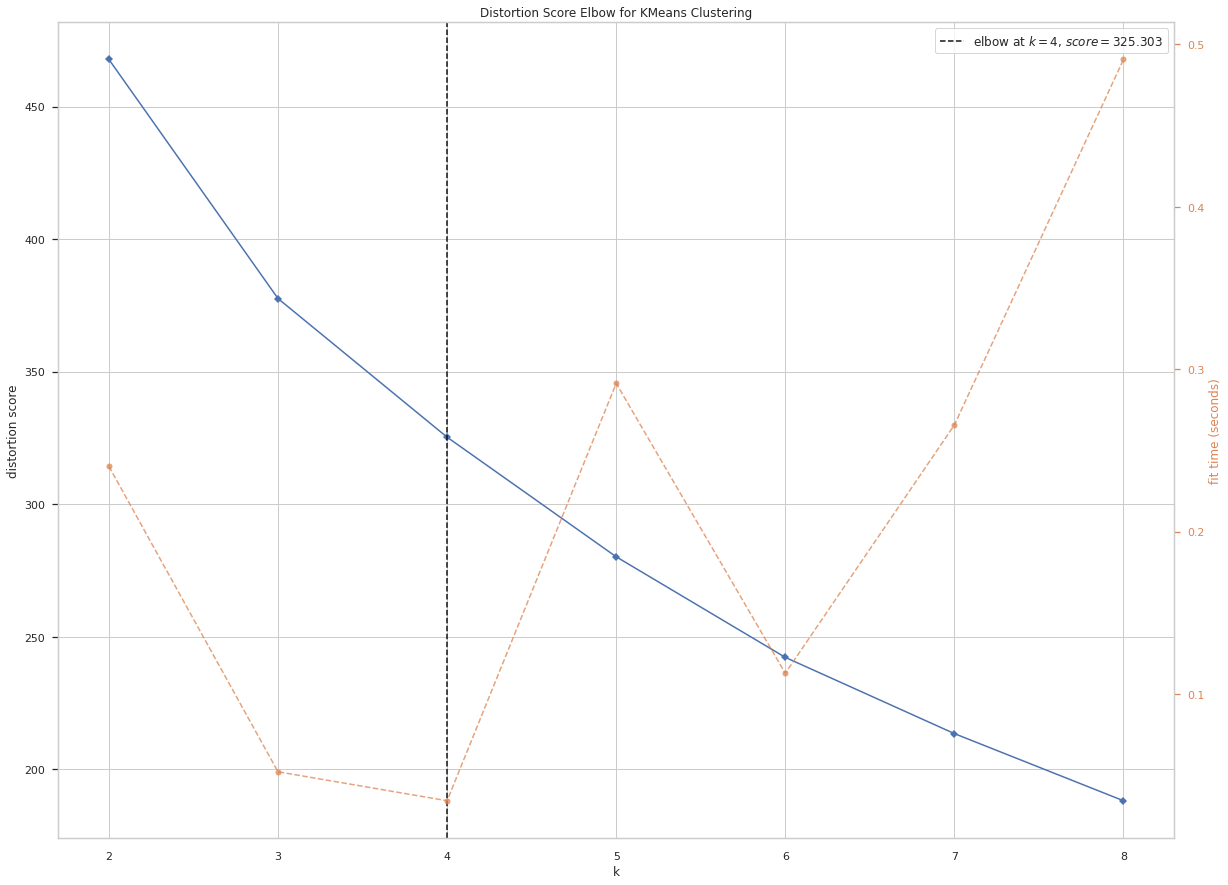

In [75]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

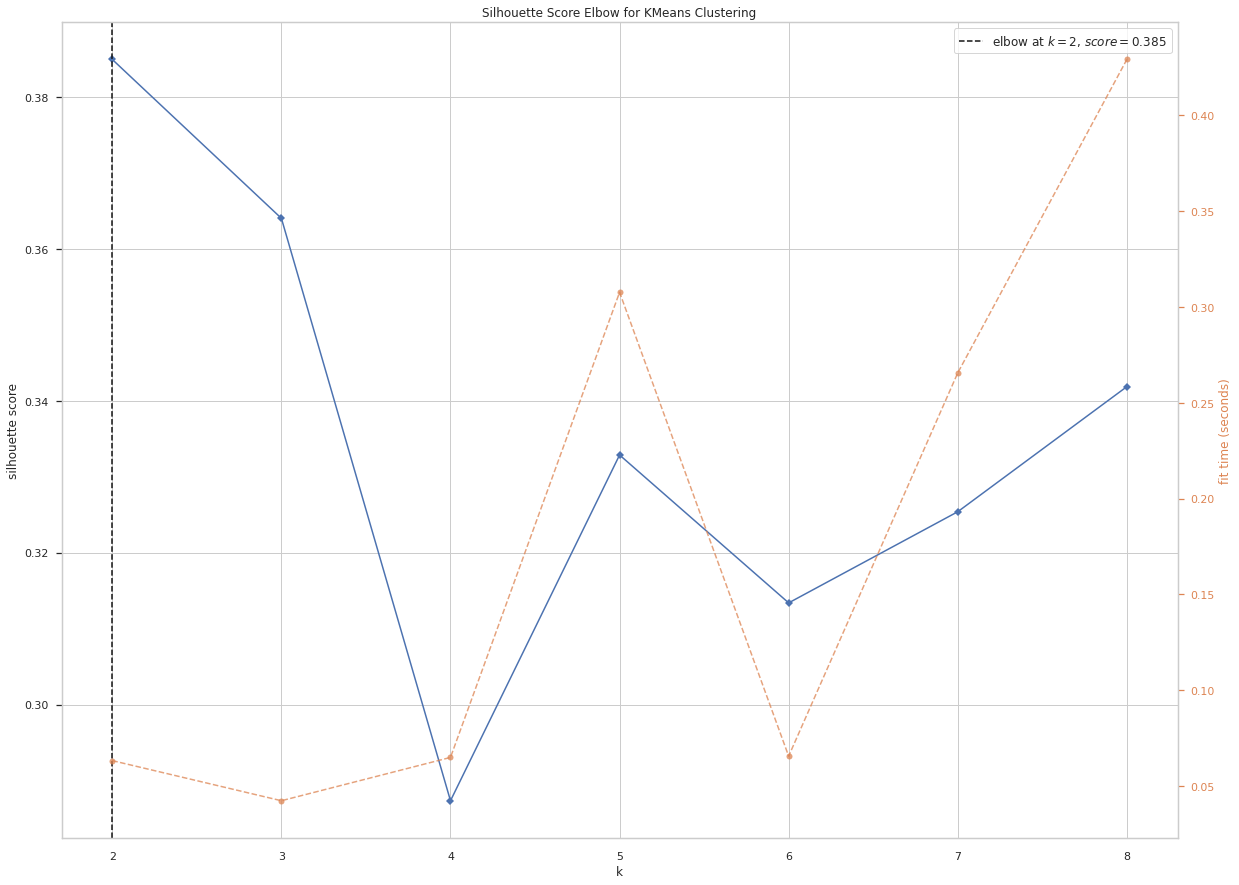

In [76]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='silhouette', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

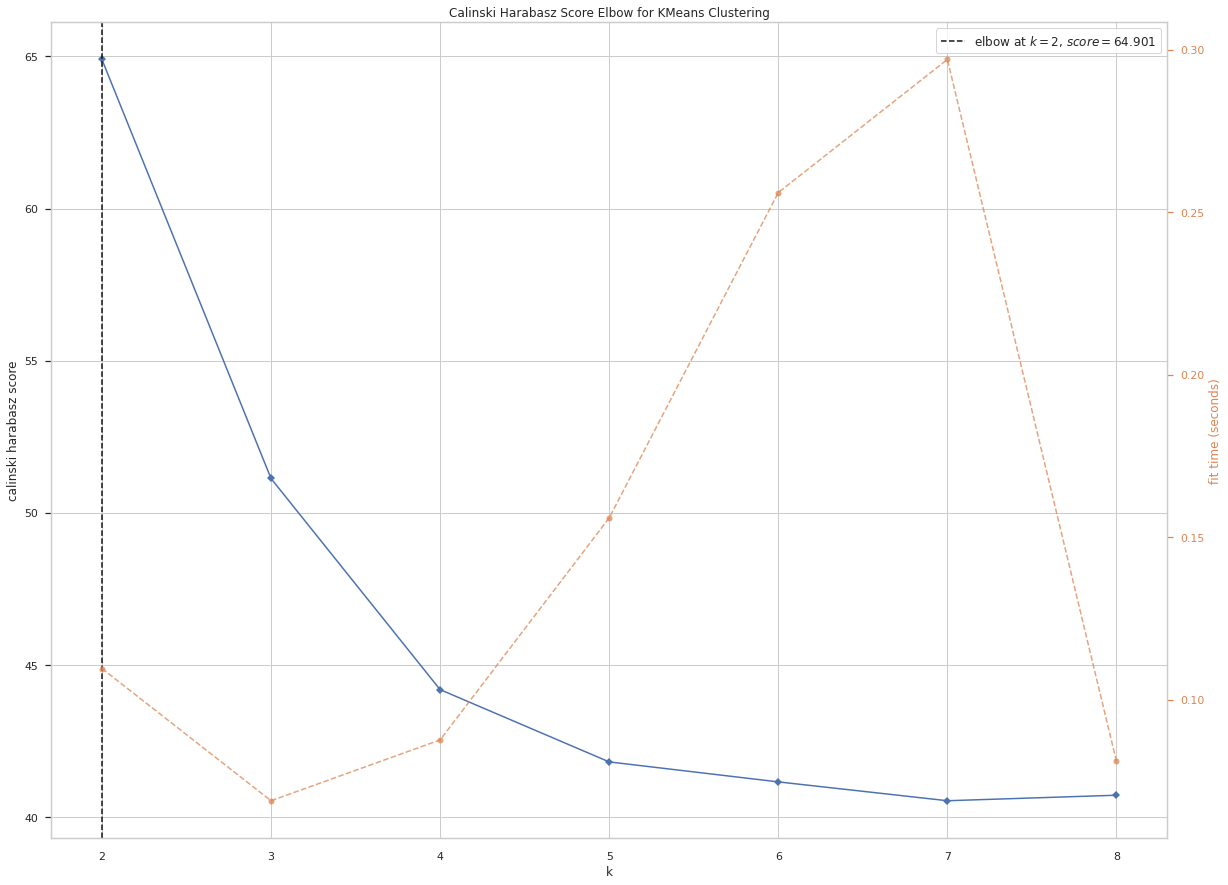

In [77]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='calinski_harabasz', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [78]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[2 1 0 3 1 2 1 1 3 0 0 1 1 3 1 3 2 1 1 1 1 0 1 2 2 3 3 0 1 1 0 1 1 0 1 1 1
 3 1 0 2 1 0 1 1 1 1 2 2 1 0 2 1 3 0 1 1 1 2 1 0 3 0 3 2 1 0 0 1 0 2 0 1 1
 0 0 2 3 0 3 0 1 3 0 0 3 0 1 0 1 3 1 3 3 0 0 0 0]
324.8088053246843
5
[[ 1.38041  0.98598 -0.40309  0.17736 -0.11438  0.18509 -0.06012  0.02689]
 [-1.95182 -0.17035 -0.10438  0.20814  0.08841 -0.08151 -0.07183 -0.04276]
 [ 3.38485 -1.35088 -0.00112  0.3884   0.14419 -0.24174  0.21389 -0.00749]
 [-0.46552 -0.25813  0.92793 -1.07705 -0.11797  0.05612  0.10377  0.05795]]


In [79]:
#To see each cluster size

Counter(kmeans.labels_)

Counter({2: 13, 1: 39, 0: 29, 3: 17})

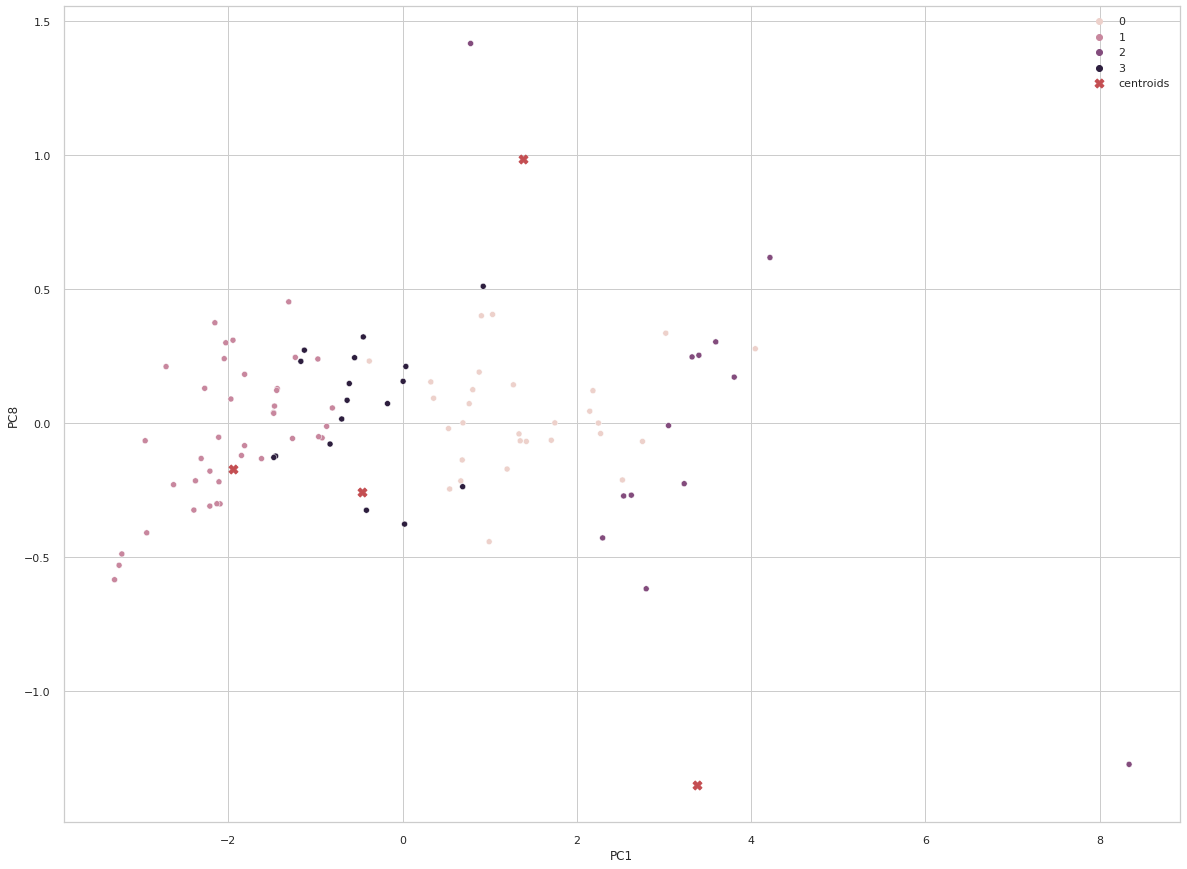

In [82]:
#Visulazing clusters
sns.scatterplot(data=data2, x="PC1", y="PC8", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

## Regression for data2

In [84]:
X=data2[['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7','PC8',]]
y=df['inr(10e3)']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=101)
lm=LinearRegression().fit(X_train,y_train)

In [86]:
print(lm.intercept_)

4769.413681632652


In [87]:
lm.coef_

array([ 1147.08114,  -559.51638,  -479.01997,   -38.17096,  1394.04703,
       -1533.46301,   705.20972,  1184.63226])

In [88]:
X_train.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'Pc5', 'PC6', 'PC7', 'PC8'], dtype='object')

In [89]:
cdf=pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
PC1,1147.0811
PC2,-559.5164
PC3,-479.0200
PC4,-38.1710
Pc5,1394.0470
PC6,-1533.4630
PC7,705.2097
PC8,1184.6323


In [90]:
predictions=lm.predict(X_test)
predictions

array([ 2756.6656,  2826.3872,  3744.    ,  2496.    ,  2654.08  ,
        7154.368 , 12338.6432,  6609.824 ,  3170.336 ,  3902.08  ,
        2594.5088,  4877.184 ,  4451.2   ,  2041.2288, 15040.9792,
       12396.8   ,  5660.928 ,  8565.024 ,  3744.    ,  8069.568 ,
        4576.    ,  2988.6272,  4695.808 ,  5408.    ,  3328.    ,
        3328.    ,  3744.    , 17888.    ,  3064.8384,  2866.9888,
       10400.    ,  5876.4992,  2745.6   ,  2912.    ,  3744.    ,
        5028.3584,  2424.9472,  2766.0672,  5604.1856,  3098.1184])

In [91]:
y_test

91    2756.6656
41    2826.3872
25    3744.0000
1     2496.0000
6     2654.0800
54    7154.3680
76   12338.6432
50    6609.8240
31    3170.3360
79    3902.0800
32    2594.5088
21    4877.1840
92    4451.2000
43    2041.2288
16   15040.9792
48   12396.8000
3     5660.9280
47    8565.0240
37    3744.0000
58    8069.5680
66    4576.0000
55    2988.6272
2     4695.8080
13    5408.0000
57    3328.0000
53    3328.0000
82    3744.0000
51   17888.0000
45    3064.8384
14    2866.9888
23   10400.0000
80    5876.4992
26    2745.6000
22    2912.0000
69    3744.0000
27    5028.3584
20    2424.9472
65    2766.0672
30    5604.1856
35    3098.1184
Name: inr(10e3), dtype: float64

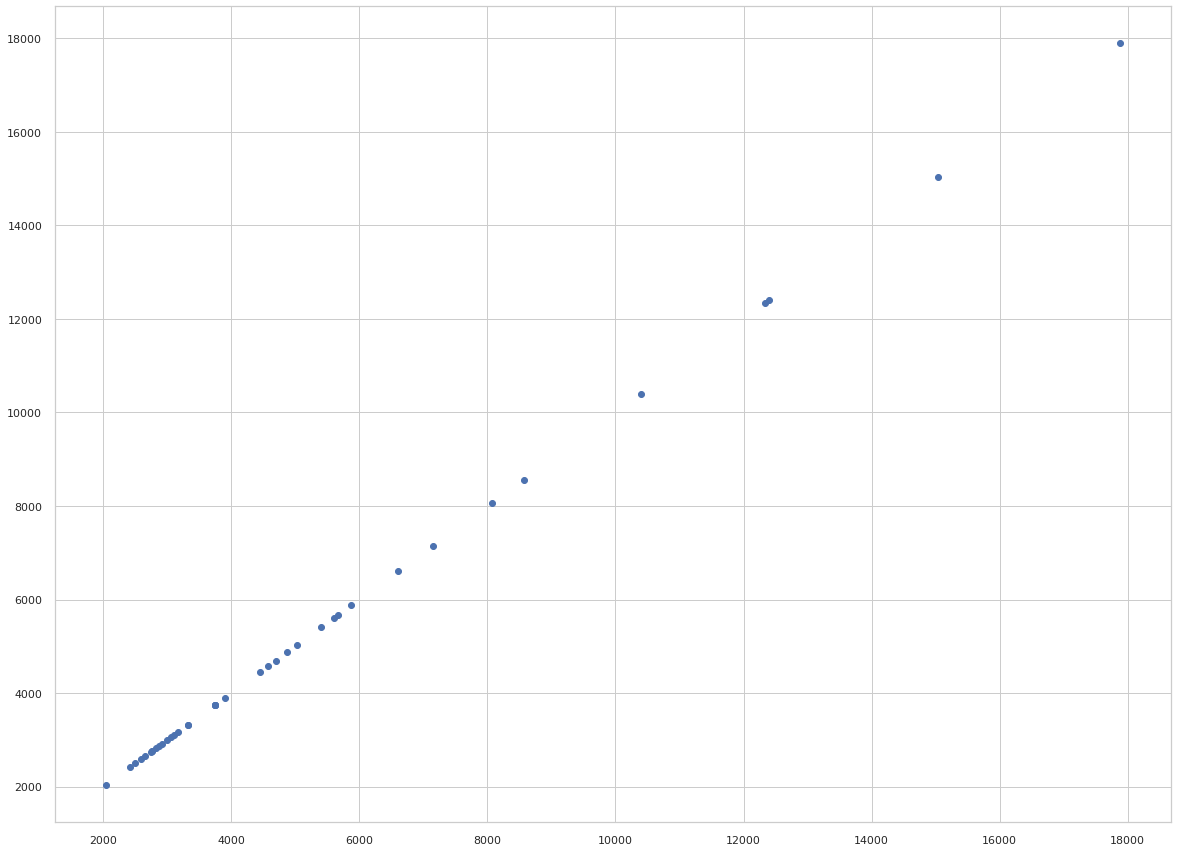

In [92]:
plt.scatter(y_test, predictions)

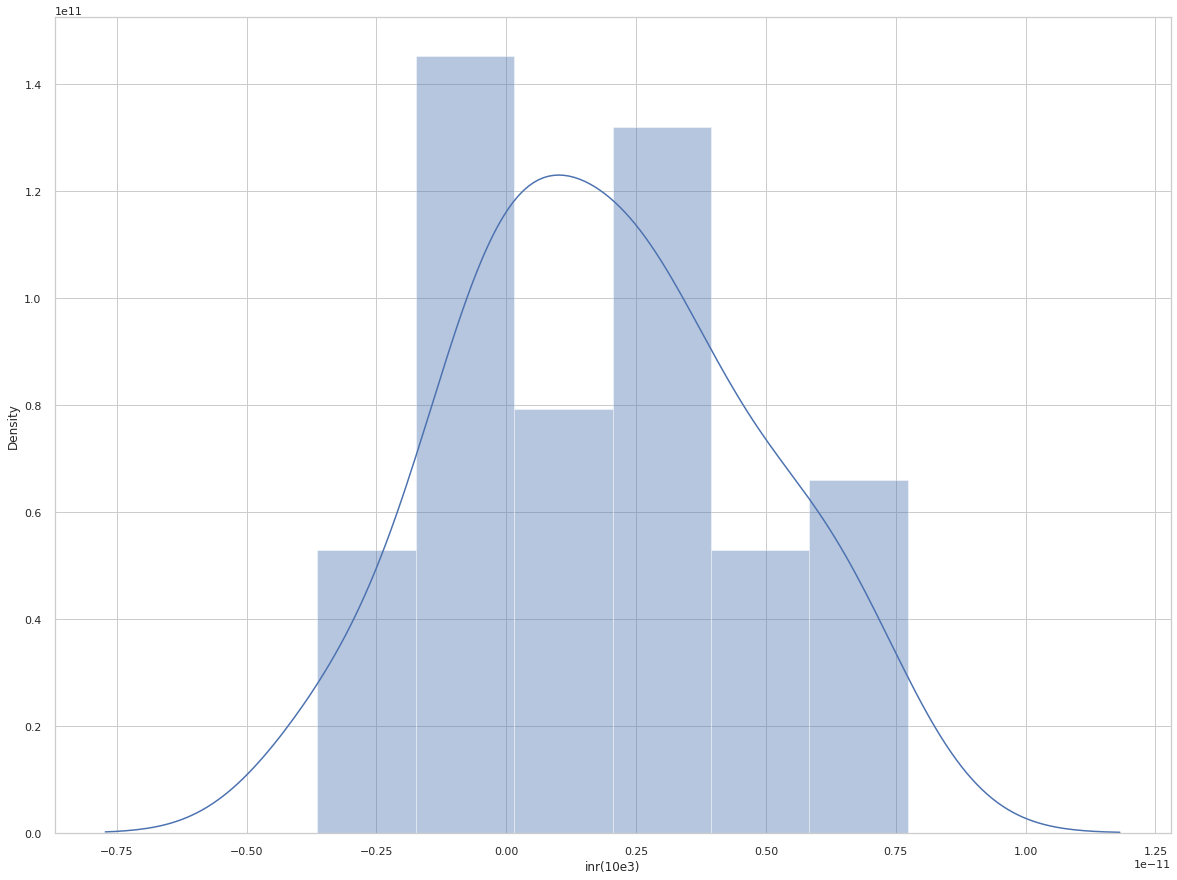

In [93]:
#Residual histogram plot
sns.distplot((y_test-predictions))

In [94]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 2.6261659513693304e-12
MSE: 1.1420262332060239e-23
RMSE: 3.3793878635131894e-12


In [95]:
metrics.mean_absolute_error(y_test,predictions)

2.6261659513693304e-12

In [96]:
metrics.mean_squared_error(y_test,predictions)

1.1420262332060239e-23

In [97]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

3.3793878635131894e-12